# 프로젝트 : 다양한 OCR모델 비교하기

[Google OCR API](https://cloud.google.com/vision), [keras-ocr](https://keras-ocr.readthedocs.io/en/latest/index.html), [Tesseract](https://pypi.org/project/pytesseract/)<br>
이 세 가지 OCR 모듈을 검증해보고 비교해보는 프로젝트를 진행해보자.
- 텍스트의 모양
- 텍스트의 크기
- 텍스트의 배치
- 텍스트의 노이즈<br>
등이 OCR의 성능에 영향을 미치는 주요한 요인들이다.
<br> 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize 하는지를 검증하기 위한 이미지 데이터를 사용해야한다.

In [1]:
# 버전 확인

import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


---

## Step 1. 검증용 데이터셋 준비

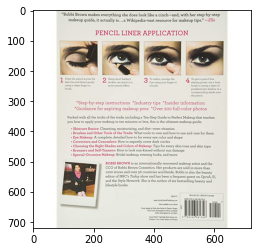

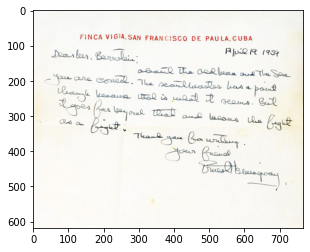

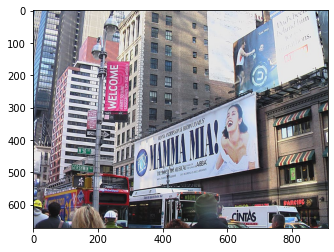

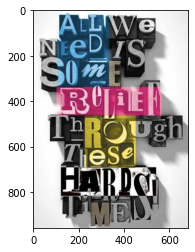

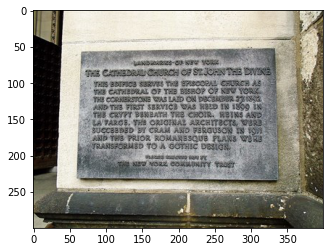

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

image_dir = os.getenv('HOME')+'/aiffel/ocr_python/projectimg/'
image_list = os.listdir(image_dir)

for img in image_list:
    image_pil = Image.open(os.path.join(image_dir, img))
    image = np.array(image_pil)
    plt.imshow(image)
    plt.show()

---

## Step 2. 세 가지 OCR로 테스트 진행
이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아보자.

#### 1) keras API

In [3]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [4]:
# 테스트에 사용할 이미지 지정

images = [ keras_ocr.tools.read(os.path.join(image_dir, img)) for img in image_list]
prediction_groups = [pipeline.recognize([os.path.join(image_dir, img)]) for img in image_list]

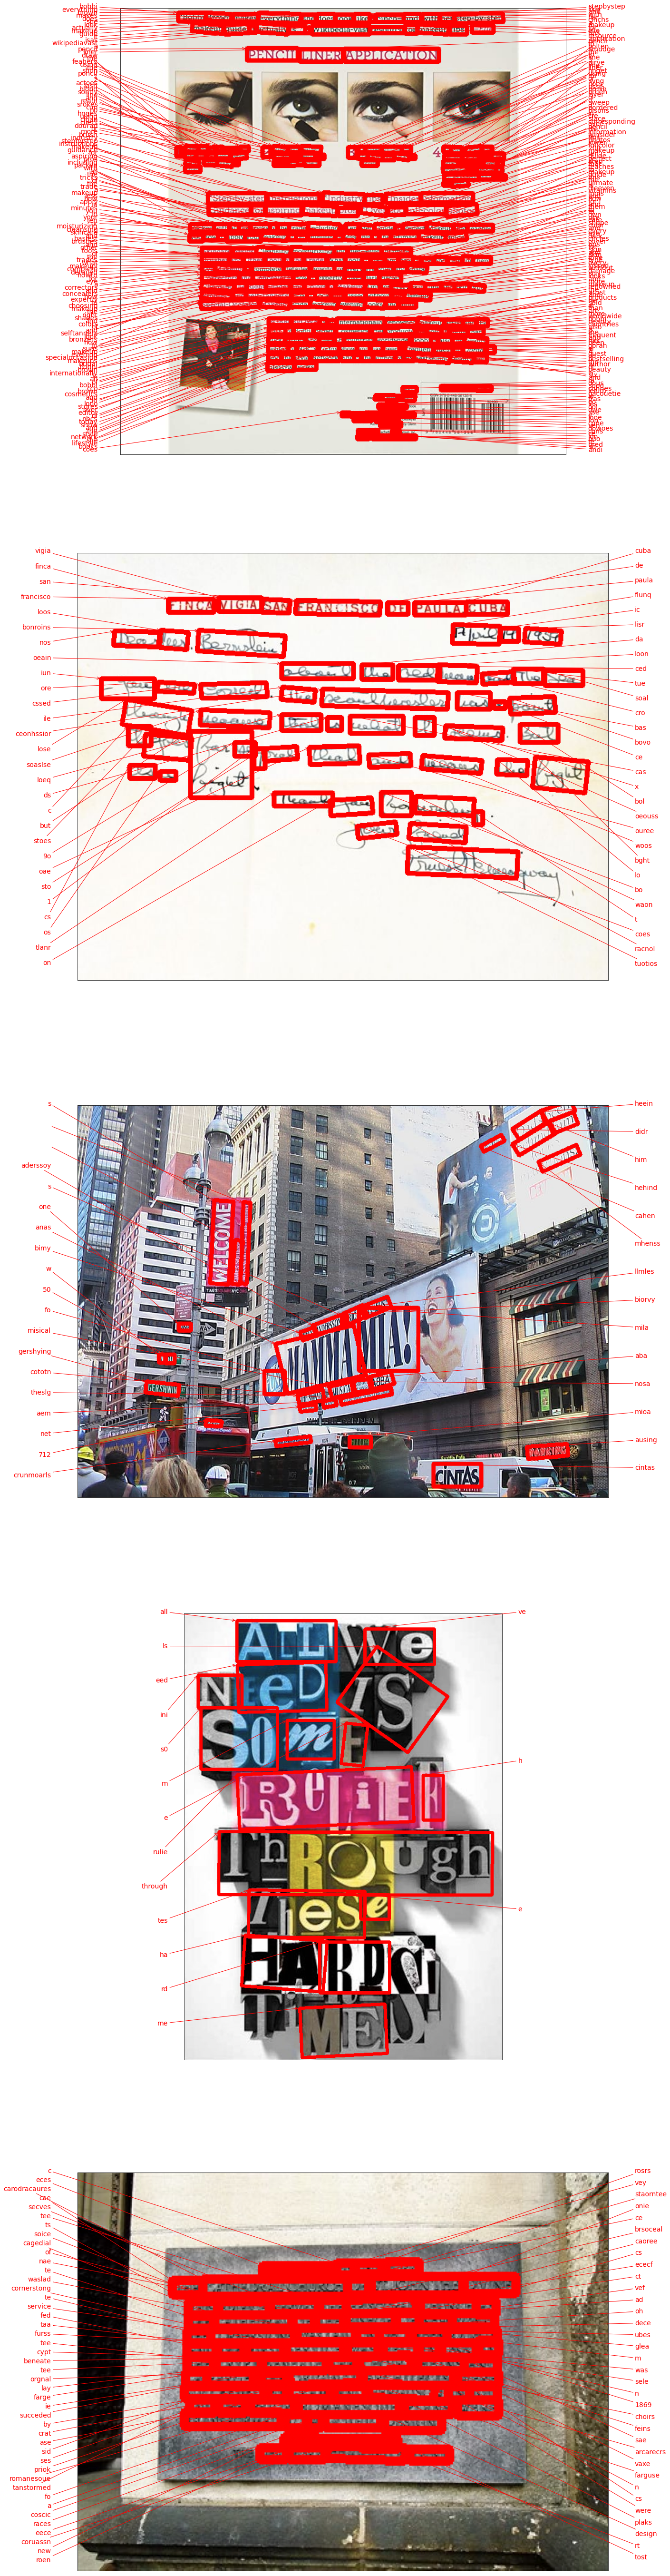

In [5]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 100))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

#### 2) tesseract

In [6]:
import pytesseract
from PIL import Image
from pytesseract import Output

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def recognize_images(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [7]:
output_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract'

for img in image_list:
    print("<<<<<< image >>>>>>")
    print()
    recognize_images(os.path.join(image_dir, img), output_dir)
    print()
    print()

<<<<<< image >>>>>>

“Bobbi

Brown

makes

everything

she

does

look

like


cinch—and,

with

her

step-by-step

makeup

quide,

it

actually

is...a

Wikipedia-vast

resource

for

makeup

tips.

Elle

—

=

PENCIL

LINER

APPLICATION

Ban eS

a. a

Inger or


ab

raw the pencil

at ete

a

sing

short feathery

smudcipe the

io give

ws

pencil line

lash line and blend gently

/

Cee cre ae

e USing YOU ange; oF

ON athe

i

ru

powdered eye sineGow in




repin

Pe (ee

yer

“Step-by-step

instructions

“Industry

tips

"Insider

intormation

“Guidance

tor

aspiring

makeup

LOS

"(ver

ZOO

hill-color

photos

Packed

with

“1

Phe

Hicks

ot

the

trade,

including

+

len-step

Guide

(Oo

Pertect

Makeup

that

teaches

YOU

how

Lo

apply

yVur

makeup

tak

L@Th

rit iL es

UE

ess.

this

iss

the

nitimmate

makeup

quide

>

Skincare

basics

Cieansing,

MOIMST

#### 3) Google API

In [8]:
# OCR API 이용 함수 정의

def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [9]:
# !ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

for img in image_list:
    print("<<<<<image>>>>>")
    print()
    detect_text(os.path.join(image_dir, img))
    print()
    print()

<<<<<image>>>>>

Texts:

""Bobbi Brown makes everything she does look like a cinch-and, with her step-by-step
makeup guide, it actually is...a Wikipedia-vast resource for makeup tips." -Elle
PENCIL LINER APPLICATION
1 Draw the pencil across the
lash line and blend gently
using a clean finger or
brush.
4 To give a pencil line
staying power, use a liner
brush to sweep a layer of
powdered eye shadow in a
corresponding shade over
the pencil.
2
Using short feathery
strokes can result in a
more natural effect
3
To soften, smudge the
line using your finger or
a brush.
*Step-by-step instructions *Industry tips *Insider information
*Guidance for aspiring makeup pros *Over 200 full-color photos
Packed with all the tricks of the trade, including a Ten-Step Guide to Perfect Makeup that teaches
you how to apply your makeup in ten minutes or less, this is the ultimate makeup guide.
• Skincare Basics: Cleansing, moisturizing, and diet-even vitamins
• Brushes and Other Tools of the Trade: What tools t

---

## Step 3. 테스트 결과 정리
모듈들마다 출력 형태가 다르기 때문에 분석 결과를 일목요연하게 정리해보는 것이 도움이 될 것이다. 시각화 방법도 함께 활용해보자.

In [10]:
# 정리해주는 함수 만들기

def oneimage_ocr(img):
    print('<<< keras-ocr >>>')
    idx = image_list.index(img)
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print()
    print('<<< Tesseract >>>')
    recognize_images(os.path.join(image_dir, img), output_dir)
    print()
    print('<<< Google OCR >>>')
    detect_text(os.path.join(image_dir, img))

#### 1) 텍스트의 모양

<<< keras-ocr >>>


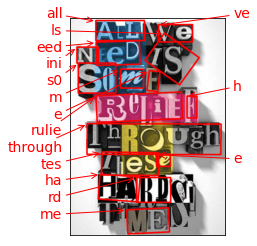


<<< Tesseract >>>

Done

<<< Google OCR >>>
Texts:

"ALLWE
NieD IS
IS
SOE
'h
Tese
HARDO
MED
"

"ALLWE"

"NieD"

"IS"

"IS"

"SOE"

"'h"

"Tese"

"HARDO"

"MED"
bounds: (154,845),(493,811),(506,934),(167,968)


In [11]:
oneimage_ocr('signboard.png')

> 텍스트의 모양이 다양하게 분포되어 있는 이미지로 먼저 테스트를 해보았는데, keras api는 같은 단어 내에서도 색깔이 다르게 표현될 때 다른 단어라고 인식하고 따로 구별해내는 모습을 보였다. 또 형태를 못알아보는 글자도 있고, W를 V 두개로 인식해서 잘못 구별하는 경우도 있었지만, through는 구별해내는 등 꽤 나쁘지 않는 성능을 보였다.
<br> tesseract는 아예 글자를 인식하지 못하는 모습을 보였다. 아마도 그림에 가까운 글자 모양이라서 텍스트라고 인식하지 못한 것 같다.
<br> Google api는 색깔이 달라도 같은 인식 범위 내에 있으면 같은 단어로 보았다. 하지만 Need를 NieD로 인식하거나, 아예 인식 못하는 몇 개의 알파벳이 있는데 그것은 사람이 보아도 헷갈릴 정도의 모양이기 때문에 Google api는 나름대로 최선을 다했다고 생각이 들었다.

#### 2) 텍스트의 크기

<<< keras-ocr >>>


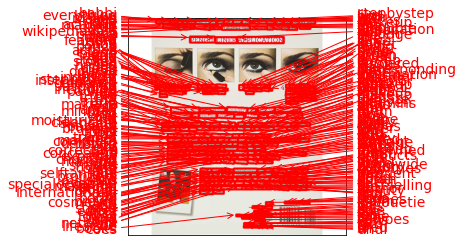


<<< Tesseract >>>
“Bobbi

Brown

makes

everything

she

does

look

like


cinch—and,

with

her

step-by-step

makeup

quide,

it

actually

is...a

Wikipedia-vast

resource

for

makeup

tips.

Elle

—

=

PENCIL

LINER

APPLICATION

Ban eS

a. a

Inger or


ab

raw the pencil

at ete

a

sing

short feathery

smudcipe the

io give

ws

pencil line

lash line and blend gently

/

Cee cre ae

e USing YOU ange; oF

ON athe

i

ru

powdered eye sineGow in




repin

Pe (ee

yer

“Step-by-step

instructions

“Industry

tips

"Insider

intormation

“Guidance

tor

aspiring

makeup

LOS

"(ver

ZOO

hill-color

photos

Packed

with

“1

Phe

Hicks

ot

the

trade,

including

+

len-step

Guide

(Oo

Pertect

Makeup

that

teaches

YOU

how

Lo

apply

yVur

makeup

tak

L@Th

rit iL es

UE

ess.

this

iss

the

nitimmate

makeup

quide

>

Skincare

basics

Cieansing,

MOIMSTUP

In [12]:
oneimage_ocr('pencilliner.jpg')

> 세 가지 모듈들이 과연 작은 글자도 잘 인식할까 궁금해서 매우 작은 글씨가 쓰여져 있는 화장품 사용설명서를 인식하게 했는데, 우선 keras api부터 살펴보면 생각보다 꽤 잘 인식하는 것 같았다. 꽤 많은 단어들에서 정확도가 높았고, 가끔 철자를 잘못 인식하여 다르게 출력되는 경우도 종종 있었지만, 이정도면 정말 잘 인식하는 편인 것 같다.
<br> tesseract도 작은 글자를 예상보다 훨씬 잘 인식하는 것 같았다. 다만 위의 사진에서 네 개의 눈 사진 바로 밑에 있는 아주 작은 글씨들은 거의 인식하지 못하는 모습을 보인다. 이것은 너무 작은 글씨까지는 불가능한 것 같다.
<br> Google api는 거의 95% 이상의 인식률을 보인다. 특히 tesseract가 인식하지 못한 아주 작은 글씨들까지 다 정확하게 인식하여 놀라운 성능을 보였다. 텍스트로 모여져 있는 문단 자체를 인식하는 것이 굉장히 신기하다.

#### 3) 텍스트의 배치

<<< keras-ocr >>>


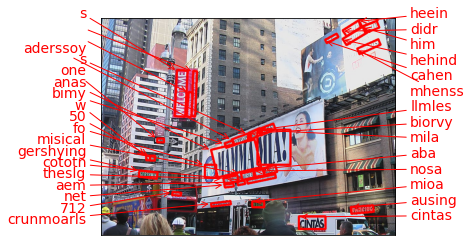


<<< Tesseract >>>

Done

<<< Google OCR >>>
Texts:

"Dads bee
hehind him
Team Hayr
w.athons.
DEV
ITMES.OUARENIC ORG
ONE
NAY
W 50 ST
BEYANDERSSON& BIORV ULVAEUS
GERSHWIN
WAY
BNDIN
THE SA MUSICAL A8BA
71325
man arom
REINNAN
MI04
NANKING 2
07
CINTAS
WELCOME
TIMES SQUARE
CROSSROADS OF THE WORLD
"

"Dads"

"bee"

"hehind"

"him"

"Team"

"Hayr"

"w.athons."

"DEV"

"ITMES.OUARENIC"

"ORG"

"ONE"

"NAY"

"W"

"50"

"ST"

"BEYANDERSSON&"

"BIORV"

"ULVAEUS"

"GERSHWIN"

"WAY"

"BNDIN"

"THE"

"SA"

"MUSICAL"

"A8BA"

"71325"

"man"

"arom"

"REINNAN"

"MI04"

"NANKING"

"2"

"07"

"CINTAS"

"WELCOME"

"TIMES"

"SQUARE"

"CROSSROADS"

"OF"

"THE"

"WORLD"
bounds: (284,200),(286,163),(297,164),(295,201)


In [13]:
oneimage_ocr('broadway_sign(noise).jpeg')

> 텍스트의 배치가 약간 기울어지거나 왜곡되었을 때 어떻게 인식하는지 확인하기 위해 뉴욕의 간판들이 모여있는 이미지를 가져왔는데, 생각보다 인식을 잘 못하였다. keras api는 어떤 것이 글자인지 탐지까지는 잘하는 것 같은데, 그것이 어떤 글자인지 인식하는 데 많이 애를 먹는 것 같다. 중간 철자가 틀리거나 아예 맞지 않는 단어들이 대부분이다.
<br> tesseract는 여기서 역시 텍스트를 아무것도 인식하지 못하였다.
<br> Google api는 나머지 두 모델에 비해 그나마 인식에 성공한 단어들이 몇 개 있지만, 이것도 텍스트의 배치와 노이즈의 영향 때문인지 인식률이 확 떨어진 듯 하다.

#### 4) 텍스트의 노이즈

<<< keras-ocr >>>


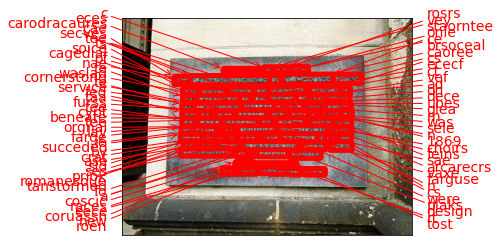


<<< Tesseract >>>
“e

ae

Ae Fe ae |

te

LAN WARS OF SW YORK


| a E

Done

<<< Google OCR >>>
Texts:

"ANDAR-OA Ew VORS
THE CATHEDRAL CHURCH OF StJOHN THE DIVINE
THIS BDIPICE SBRVES THE BPASCOPAL CHURCH AS
THS CATHEDRAL OF THE BISROP OF NEW YORK.
THE CORNERSTONE WAS LAID ON DECERBER 27E92
AND THE FIRST SERVICE WAS HBLD IN 1899 IN
THE CRYPT BENBATH THE CHOIR. HBINS AND
LA FARGE. THe ORIGINAL ARCAITECTS, WERE
SUCCEBDED BT CRAM AND FBRGUSON IN 19
AND THE PRIOR ROMANBSQUE PLANS WERE
TRANSFORMBD TO A GOTHIC DESIGN.
"

"ANDAR-OA"

"Ew"

"VORS"

"THE"

"CATHEDRAL"

"CHURCH"

"OF"

"StJOHN"

"THE"

"DIVINE"

"THIS"

"BDIPICE"

"SBRVES"

"THE"

"BPASCOPAL"

"CHURCH"

"AS"

"THS"

"CATHEDRAL"

"OF"

"THE"

"BISROP"

"OF"

"NEW"

"YORK."

"THE"

"CORNERSTONE"

"WAS"

"LAID"

"ON"

"DECERBER"

"27E92"

"AND"

"THE"

"FIRST"

"SERVICE"

"WAS"

"HBLD"

"IN"

"1899"

"IN"

"THE"

"CRYPT"

"BENBATH"

"THE"

"CHOIR."

"HBINS"

"AND"

"LA"

"FARGE."

"THe"

"ORIGINAL"

"ARCAITECTS,"

"WERE"

"

In [14]:
oneimage_ocr('church.jpeg')

> 교회의 비석에 새겨진 글은 약간 노이즈가 많이 껴있는 텍스트인 것 같아서 가져와봤다. 
<br> keras api는 이렇게 노이즈가 껴있는 글자들의 철자들을 대부분 틀린 상태로 인식하였다. 꽤 영향을 많이 미치는 듯 하다.
<br> tesseract는 역시나 거의 인식하지 못하고 종료해버렸다.
<br> Google api는 놀라울 정도로 거의 정확하게 인식하였다. 물론 노이즈 떄문인지 E를 B로 착각하거나, H를 A로 인식하는 등의 실수는 있지만, 이 정도면 나머지 두 모델에 비해 월등한 성능이라고 얘기할 수 있을 것 같다.

#### 5) 필기체는 얼마나 잘 인식하는지

<<< keras-ocr >>>


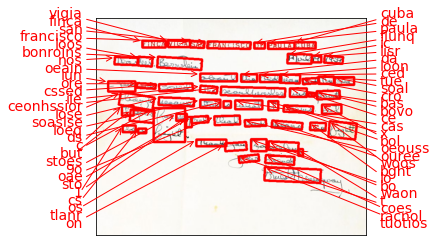


<<< Tesseract >>>
rFiNCA

VIGIA, SAN

FRAN? !SCO

DE

PAULA.CUBA

oon

a

R jie

IR

(IS

OoCoos.

Q

Te

Ge

store

Gul

The

Sea

ae

Pe one

CSemreedd -

“Thee

Reon

POR

Lees

‘

pout

NO:

Paul

te

ws

wesQsv

p

(FLO bee Db .

2.0

Sie

at

| GY 8}

-

6

oO

MALO on

Ora

Crag

w

That

“eee

:



Done

<<< Google OCR >>>
Texts:

"FINCA VIGIA, SAN FRANCISCO DE PAULA, CUBA
Aluil 19 1959
Dearlees. Bernolein.:
oboul The Bed leeoa oud The See
are cored. The seoulluastler kas a poul
leange keaaue lol is ulat t seems. Bet
goes far beyorel Theal and leacaus lee Gaght
you
Theal aud lacaus le egut
Bigut.
as a
Thank you bauelCup.
Jour framal
"

"FINCA"

"VIGIA,"

"SAN"

"FRANCISCO"

"DE"

"PAULA,"

"CUBA"

"Aluil"

"19"

"1959"

"Dearlees."

"Bernolein.:"

"oboul"

"The"

"Bed"

"leeoa"

"oud"

"The"

"See"

"are"

"cored."

"The"

"seoulluastler"

"kas"

"a"

"poul"

"leange"

"keaaue"

"lol"

"is"

"ulat"

"t"

"seems."

"Bet"

"goes"

In [15]:
oneimage_ocr('hemingway_short.jpeg')

> 필기체도 노이즈가 껴있는 텍스트와 마찬가지일 것이다. 하지만 이런 특이한 필기체를 제대로 인식하는지 궁금해서 어니스트 헤밍웨이의 손글씨가 적혀있는 이미지를 넣어봤다.
keras api는 단어들의 위치는 거의 다 파악을 하지만, 대부분 맞는 단어가 없다. 아주 가끔 인식에 성공했지만, 거의 알아보지 못하고 있다고 볼 수 있다.
<br> tesseract도 텍스트에서 단어들의 위치 정도는 다 파악하는 것 같다. 그것이 텍스트라는 것은 인지를 하고 있나보다. 다만 마찬가지로 어떤 단어인지, 제대로 된 철자로 인식을 하지 못한다.
<br> Google api는 대충 비슷하게 인식을 한 것 같은데, 그래도 여태껏 중에 가장 어려운 난이도였나보다. 하긴 사람 눈으로 봐도 알아보지 못할 글자들이 많이 보이는데, Google api가 인식해낸 것을 읽어봤을 때 무슨 뜻인지는 모르겠지만 그래도 최선을 다한 것 같은 느낌이 든다.

---

## Step 4. 결과 분석과 결론 제시

결과적으로 GOOGLE OCR API가 나머지 두 모델들보다 정말 월등한 성능을 보인다. 텍스트의 모양, 크기, 배치, 노이즈, 필기체 등 전체적으로 가장 우수하게 인식을 해내었다. KERAS API는 텍스트의 배치가 이상하거나, 노이즈가 심할 때는 인식의 정확도가 떨어지지만, 그 외에는 다 잘 인식하는 것 같다. 또 인식을 못하더라도 탐지는 꾸준히 잘해내는 것 같다. Tesseract는 성능이 확실히 떨어지는 것을 보인다. 

---

# 회고

OCR 모델들을 비교분석 해보는 과정은 재미있었다. 근데 생각보다 인식을 못하는 경우가 많아서 좀 아쉬웠는데, 이미지를 잘못 고른 탓도 있는 것 같다. 너무 인식하기 어려운 이미지들만 가져와서 그런 것 같다. 한글로도 테스트 해보고 싶었는데, 한국어를 지원하지 않는 모델들이 있어서 여기서 진행하기는 애매했고, 나중에 따로 한번 실험을 해봐야겠다.